# Linear regression (predicting a salinity value with temprature):

*** Question:**
>     CalCOFI data: Over 60 years of oceanographic data: Is there a relationship between water salinity & water temperature? Can you predict the water salinity based on just temprature?

In [99]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import operator

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/calcofi/bottle.csv
/kaggle/input/calcofi/cast.csv


In [100]:
bottle = pd.read_csv("../input/calcofi/bottle.csv")
bottle.head(2)

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.44,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.44,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
bottle.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587267,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [102]:
# Extract 2 columns 'T_degC','Salnty' for pure and better showing
salinity_temp = bottle[['T_degC','Salnty']]

# And called again
salinity_temp.columns = ['Temperature', 'Salinity']

In [103]:
salinity_temp = salinity_temp[:][:500]      # lets take limit for speed regression calculating
salinity_temp

,Temperature,Salinity
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421
...,...,...
495,4.90,34.269
496,4.50,34.310
497,4.48,34.311
498,4.21,34.319


/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


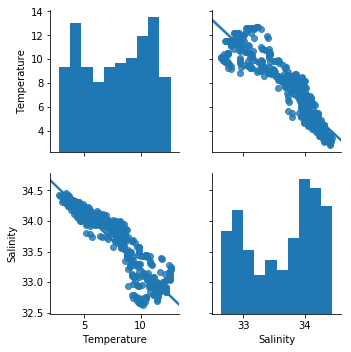

In [104]:
# See picture with scatter or plot method

# sns.lmplot(x="Salinity", y="Temperature", data=bottle_df, order=2, ci=None);
sns.pairplot(salinity_temp, kind="reg") 

from the graph salinity-temperature you can see that there is a linear relationship between them hence i would try to use just temprature as a future to predict salinity

In [116]:
# Picturing a residual plot to check for heteroscedasticity 
sns.residplot(salinity_temp['Salinity'], salinity_temp['Temperature'], order=2, lowess=True)


NameError: name 'salinity' is not defined

In [105]:
# see how many null values we have

salinity_temp.isnull().sum()

Temperature    1
Salinity       6
dtype: int64

In [106]:
# Drop NaN or missing input numbers

salinity_temp.fillna(method = 'ffill', inplace=True)
#bottle_df.isnull().sum()

In [107]:
# Features chose

X = np.array(salinity_temp['Temperature']).reshape(-1,1)
y = np.array(salinity_temp['Salinity']).reshape(-1,1)

In [108]:
# Split data as %20 is test and %80 is train set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# 1.Linear Regression

In [109]:
from sklearn.linear_model import LinearRegression

lin_df = LinearRegression()  
lin_df.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
y_pred = lin_df.predict(X_test)                                     # Predict Linear Model
accuracy_score = lin_df.score(X_test, y_test)                       # Accuracy score
print("Linear Regression Model Accuracy Score: " + "{:.1%}".format(accuracy_score))


Linear Regression Model Accuracy Score: 82.9%


In [48]:
from sklearn.metrics import mean_squared_error,r2_score

print("R2 Score: " +"{:.3}".format(r2_score(y_test, y_pred)));

R2 Score: 0.829


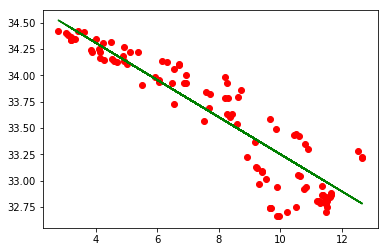

In [49]:
# Finally draw figure of Linear Regression Model

plt.scatter(X_test, y_test, color='r')
plt.plot(X_test, y_pred, color='g')
plt.show()

# 2.Multiple Linear Regression

In [50]:
mlin_df = LinearRegression()
mlin_df = mlin_df.fit(X_train, y_train)
mlin_df.intercept_       # constant b0
mlin_df.coef_            # variable coefficient

array([[-0.17605922]])

In [51]:
y_pred1 = mlin_df.predict(X_test)                                      # predict Multi linear Reg model
rmse = np.sqrt(mean_squared_error(y_test, y_pred1))
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.3}".format(r2_score(y_test, y_pred1)));      # this is test error score

RMSE Score for Test set: 0.24
R2 Score for Test set: 0.829


## 2.1.Multiple Linear Regression Model Tunning

In [52]:
# cross validation method is giving better and clear result

cross_val_score(mlin_df, X, y, cv=10, scoring = 'r2').mean()

0.7880612499193689

In [53]:
mlin_df.score(X_train, y_train)      # r2 value

0.853486743991655

In [54]:
np.sqrt(-cross_val_score(mlin_df, 
                X_train, 
                y_train, 
                cv=10, 
                scoring = 'neg_mean_squared_error')).mean()

0.2132384938923896

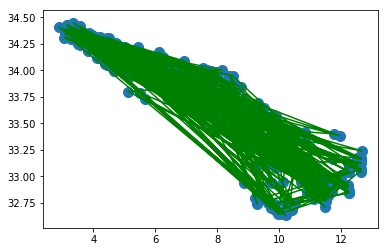

In [55]:
# Finally draw figure of Multiple Linear Regression Model

plt.scatter(X_train, y_train, s=100)

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,y_pred), key=sort_axis)
X_test, y_pred = zip(*sorted_zip)
plt.plot(X_train, y_train, color='g')
plt.show()

# 3.Polynomial Regression

In [64]:
from sklearn.preprocessing import PolynomialFeatures

poly_df = PolynomialFeatures(degree = 4)
transform_poly = poly_df.fit_transform(X_train)
#transform_poly1 = poly_df.fit_transform(X_test)
linreg2 = LinearRegression()
linreg2.fit(transform_poly,y_train)

polynomial_predict = linreg2.predict(transform_poly)
#polynomial_predict1 = linreg2.predict(transform_poly1)


In [65]:
transform_poly1 = poly_df.transform(X_test)

polynomial_predict1 = linreg2.predict(transform_poly1)

In [66]:
rmse = (mean_squared_error(y_train,polynomial_predict))
r2 = r2_score(y_train,polynomial_predict)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 0.031
R2 Score for Test set: 0.9


In [67]:
rmse = (mean_squared_error(y_test,polynomial_predict1))
r2 = r2_score(y_test,polynomial_predict1)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 0.04
R2 Score for Test set: 0.88


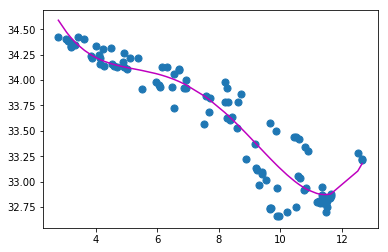

In [68]:
plt.scatter(X_test, y_test, s=50)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_test,polynomial_predict1), key=sort_axis)
X_test, polynomial_predict1 = zip(*sorted_zip)
plt.plot(X_test, polynomial_predict1, color='m')
plt.show()

# 4.Decision Tree Regression

In [75]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()          # create  DecisionTreeReg with sklearn
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [76]:
dt_predict = dt_reg.predict(X_test)
#dt_predict.mean()

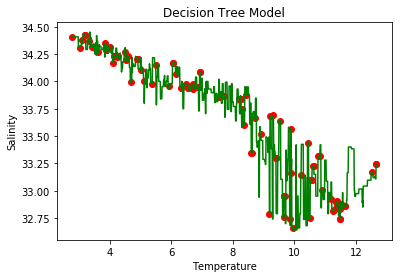

In [77]:
plt.scatter(X_test,dt_predict, color="red")                           # scatter draw
X_grid = np.arange(min(np.array(X_test)),max(np.array(X_test)), 0.01)  
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,dt_reg.predict(X_grid),color="g")                 # line draw
plt.xlabel("Temperature")
plt.ylabel("Salinity")
plt.title("Decision Tree Model")
plt.show()

In [78]:
rmse = np.sqrt(mean_squared_error(y_test, dt_predict))
r2 = r2_score(y_test,dt_predict)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 0.25
R2 Score for Test set: 0.82


# 5.Random Forest Model

In [79]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=10, random_state=0)
rf_reg.fit(X_train,y_train)
rf_predict = rf_reg.predict(X_test)
#rf_predict.mean()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


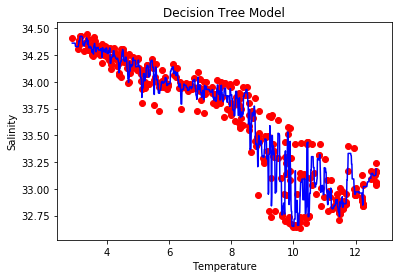

In [80]:
plt.scatter(X_train,y_train, color="red")                           # scatter draw
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01)  
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid,rf_reg.predict(X_grid),color="b")                 # line draw
plt.xlabel("Temperature")
plt.ylabel("Salinity")
plt.title("Decision Tree Model")
plt.show()

In [81]:
rmse = np.sqrt(mean_squared_error(y_test, rf_predict))
r2 = r2_score(y_test, rf_predict)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 0.21
R2 Score for Test set: 0.87


**Result:** When we revise 5 models, best one is Polynomial Regression Model with %88 accuracy score.